In [1]:
#import packages
import pandas as pd
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt 

In [2]:
#full edge list

df = pd.read_csv('../combined_final_weighted.csv')
df

,node_start,node_end,status,weight
0,Hong Kong,Samoa,jurisdiction,2.0
1,Hong Kong,Samoa,jurisdiction,2.0
2,Hong Kong,Samoa,jurisdiction,2.0
3,Hong Kong,Samoa,jurisdiction,2.0
4,Hong Kong,Samoa,jurisdiction,2.0
...,...,...,...,...
338119,Indonesia,British Virgin Islands,officer_base,1.0
338120,Cook Islands,British Virgin Islands,officer_base,1.0
338121,Hong Kong,British Virgin Islands,officer_base,1.0
338122,Cook Islands,United Kingdom,officer_base,1.0


In [3]:
#df for all relationships

df_all = pd.read_csv('../combined_final_weighted_groupedby.csv')
df_all

,node_start,node_end,weight
0,Albania,Bahamas,4.0
1,Algeria,British Virgin Islands,2.0
2,Algeria,United Kingdom,2.0
3,Algeria,United States,1.0
4,Andorra,Bahamas,52.0
...,...,...,...
2835,Zimbabwe,Hong Kong,3.0
2836,Zimbabwe,Jersey,1.0
2837,Zimbabwe,Panama,6.0
2838,Zimbabwe,Russia,2.0


In [4]:
# df for only jur

df_only_jur = df[df['status'] == 'jurisdiction']
df_only_jur = df_only_jur.drop(['weight','status'], axis = 1)
df_only_jur_grouped = df_only_jur.groupby(['node_start','node_end'], as_index = False).size()
df_only_jur_grouped

,node_start,node_end,size
0,Albania,Bahamas,2
1,Andorra,Bahamas,26
2,Andorra,British Virgin Islands,39
3,Andorra,Cayman Islands,1
4,Andorra,Costa Rica,3
...,...,...,...
1212,Vietnam,Panama,1
1213,Yemen,Panama,1
1214,Zambia,British Virgin Islands,2
1215,Zimbabwe,British Virgin Islands,5


In [5]:
# df for all jur

all_jur_list = ['jurisdiction', 'officer_jurisdiction','intermediary jurisdiction']

df_all_jur = df[df['status'].isin(all_jur_list)]
df_all_jur = df_all_jur.drop(['weight','status'], axis = 1)
df_all_jur_grouped = df_all_jur.groupby(['node_start','node_end'], as_index = False).size()
df_all_jur_grouped

,node_start,node_end,size
0,Albania,Bahamas,2
1,Andorra,Bahamas,26
2,Andorra,British Virgin Islands,39
3,Andorra,Cayman Islands,1
4,Andorra,Costa Rica,3
...,...,...,...
1222,Vietnam,Panama,1
1223,Yemen,Panama,1
1224,Zambia,British Virgin Islands,2
1225,Zimbabwe,British Virgin Islands,5


In [6]:
#df for no intermediaries

no_int_list = ['jurisdiction', 'officer_jurisdiction','officer_base']

df_no_int = df[df['status'].isin(no_int_list)]
df_no_int = df_no_int.drop(['weight','status'], axis = 1)
df_no_int_grouped = df_no_int.groupby(['node_start','node_end'], as_index = False).size()
df_no_int_grouped

,node_start,node_end,size
0,Albania,Bahamas,2
1,Algeria,British Virgin Islands,2
2,Algeria,United Kingdom,2
3,Algeria,United States,1
4,Andorra,Bahamas,26
...,...,...,...
2750,Zimbabwe,Hong Kong,3
2751,Zimbabwe,Jersey,1
2752,Zimbabwe,Panama,3
2753,Zimbabwe,Russia,2


In [7]:
#function to get edge list

def get_edge_list(comm, comm_node_df, edges_df):
    
    #get list of nodes in specified community
    comm_node_list = comm_node_df[comm_node_df['community'] == comm]['name'].tolist()

    #get new edge list
    comm_df = edges_df[edges_df['node_end'].isin(comm_node_list)]
    comm_df = comm_df[comm_df['node_start'].isin(comm_node_list)].reset_index(drop = True)
    
    return comm_df

### Leading Eigen Directed ALL

In [8]:
leadeigen_all_df = pd.read_csv('../directed_community_csv/df_leading_eigenvector.csv').drop('Unnamed: 0', axis = 1)
leadeigen_all_df

,name,community
0,Albania,0
1,Bahamas,0
2,Algeria,1
3,British Virgin Islands,1
4,United Kingdom,1
...,...,...
191,Venezuela,0
192,Vietnam,1
193,Yemen,0
194,Zambia,1


In [9]:
#show how function works

get_edge_list(comm = 0, comm_node_df = leadeigen_all_df, edges_df =  df_all)

,node_start,node_end,weight
0,Albania,Bahamas,4.0
1,Andorra,Bahamas,52.0
2,Andorra,Costa Rica,6.0
3,Andorra,Nevada,48.0
4,Andorra,Niue,24.0
...,...,...,...
232,Venezuela,Panama,1064.0
233,Venezuela,Seychelles,50.0
234,Venezuela,Switzerland,1.0
235,Venezuela,Uruguay,4.0


In [10]:
#check how many companies before running cells
leadeigen_all_df.describe()

,community
count,196.000000
mean,0.816327
std,0.621775
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,3.000000


In [11]:
#make a list of communities to run next function

leadeigen_all_comms = sorted(leadeigen_all_df['community'].unique().tolist())
leadeigen_all_comms

[0, 1, 2, 3]

In [12]:
# get edge list for all communities

community_edgelist_dfs = []

for i in range(len(leadeigen_all_comms)):
    community_edgelist_dfs.append(get_edge_list(comm = i, comm_node_df = leadeigen_all_df, edges_df =  df_all))
    


In [13]:
# get edge list by specifying community number

community_edgelist_dfs[0]

,node_start,node_end,weight
0,Albania,Bahamas,4.0
1,Andorra,Bahamas,52.0
2,Andorra,Costa Rica,6.0
3,Andorra,Nevada,48.0
4,Andorra,Niue,24.0
...,...,...,...
232,Venezuela,Panama,1064.0
233,Venezuela,Seychelles,50.0
234,Venezuela,Switzerland,1.0
235,Venezuela,Uruguay,4.0


### Targeted Attack : Community 0

In [14]:
## try for 1st community: 0 
com_0 = community_edgelist_dfs[0]


In [15]:
#Plot graph 
g = ig.Graph.TupleList(com_0.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})

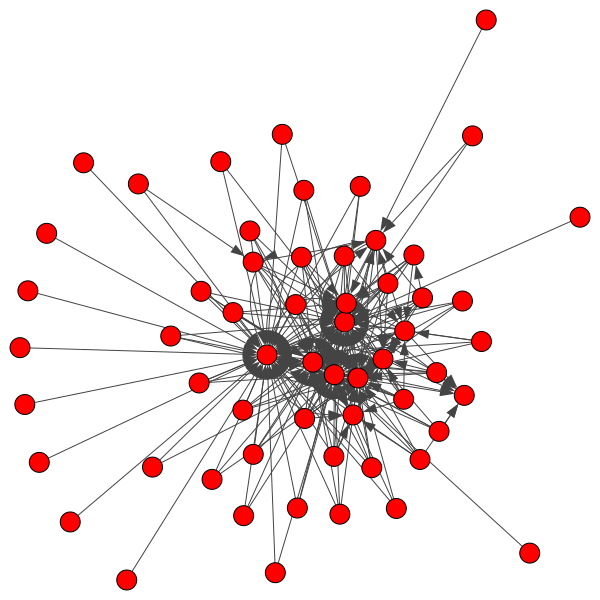

In [16]:
ig.plot(g)

In [17]:
len(g.vs.indices)

58

In [18]:
#g.vs.indices
com_0['node_start'].value_counts()

Panama                       10
Luxembourg                    9
Colombia                      9
Ecuador                       8
Venezuela                     8
Switzerland                   8
Bahamas                       8
Uruguay                       8
Spain                         8
Argentina                     7
Brazil                        7
Andorra                       7
Monaco                        6
Chile                         6
Germany                       6
Hungary                       6
Israel                        6
El Salvador                   5
Poland                        5
Belize                        5
Finland                       5
Seychelles                    5
Portugal                      5
Costa Rica                    5
Paraguay                      4
Liechtenstein                 4
Lebanon                       4
Kuwait                        4
Mexico                        4
Guatemala                     4
Peru                          4
Greece  

In [19]:
uni =com_0['node_start'].unique()

In [20]:
len(uni)

56

In [21]:
list(g.vs)

[igraph.Vertex(<igraph.Graph object at 0x7fc199de2220>, 0, {'name': 'Albania'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc199de2220>, 1, {'name': 'Bahamas'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc199de2220>, 2, {'name': 'Andorra'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc199de2220>, 3, {'name': 'Costa Rica'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc199de2220>, 4, {'name': 'Nevada'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc199de2220>, 5, {'name': 'Niue'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc199de2220>, 6, {'name': 'Panama'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc199de2220>, 7, {'name': 'Seychelles'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc199de2220>, 8, {'name': 'Uruguay'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc199de2220>, 9, {'name': 'Argentina'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc199de2220>, 10, {'name': 'Switzerland'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc199de2220>, 11, {'name': 'Luxembourg'}),
 igraph.Vertex(<

In [22]:
##try sort by indegree 
temp_df = pd.DataFrame({'Node_indice':g.vs.indices,
                         'Nodes':g.vs['name'],
                         'In_Degree':g.strength(mode='in',weights='weight')})

In [23]:
#sort by largest degree 
temp_df = temp_df.sort_values(by='In_Degree',ascending=False)

In [24]:
temp_df.head()

,Node_indice,Nodes,In_Degree
6,6,Panama,64665.0
7,7,Seychelles,12361.5
1,1,Bahamas,10228.0
5,5,Niue,10090.0
4,4,Nevada,2080.0


In [25]:
temp_df.tail()

,Node_indice,Nodes,In_Degree
28,28,El Salvador,0.0
31,31,Greece,0.0
32,32,Guatemala,0.0
33,33,Guinea,0.0
57,57,Yemen,0.0


In [26]:
#extract out by Node
order_of_del = temp_df['Nodes'].tolist()
#print the list to check it
order_of_del

['Panama',
 'Seychelles',
 'Bahamas',
 'Niue',
 'Nevada',
 'Belize',
 'Costa Rica',
 'Uruguay',
 'Wyoming',
 'Luxembourg',
 'Switzerland',
 'Israel',
 'Germany',
 'Paraguay',
 'Lesotho',
 'Liechtenstein',
 'Lebanon',
 'Lithuania',
 'Mexico',
 'Monaco',
 'Nicaragua',
 'Albania',
 'Senegal',
 'Peru',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Qatar',
 'Iran',
 'Sint Maarten (Dutch part)',
 'Spain',
 'Sudan',
 'Syria',
 'Venezuela',
 'Kuwait',
 'Finland',
 'Hungary',
 'Honduras',
 'Andorra',
 'Argentina',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Cameroon',
 'Chile',
 'Colombia',
 "Côte d'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Greece',
 'Guatemala',
 'Guinea',
 'Yemen']

In [27]:
##don't bother with unweighted so will just attempt with weighted

#Weighted on diameter
def weighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    pr = []
    auth = []
    for i in range(len(g.vs)):
        g.delete_vertices(order_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        #try pagerank 
        page = g.pagerank(directed=True, weights='weight')
        page = sum(page)/max(len(page),1)
        pr.append(page)
        #authority score normalised by default
        kleinberg = g.authority_score(weights='weight')
        kleinberg = sum(kleinberg)/max(len(kleinberg),1)
        auth.append(kleinberg)
        
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(order_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_weighted_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'avg_PageRank':pr,
                       'avg_Authority':auth,
                       'average_path_len':apl})
    
    return(df)

In [28]:
df_type2_weighted = weighted_Type2_targeted_del(g)
df_type2_weighted.head()

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,avg_PageRank,avg_Authority,average_path_len
0,1,0.01,Panama,14.245614,365.0,-0.367499,474.535088,0.054171,0.017544,0.052271,1.706897
1,2,0.01,Seychelles,9.794643,467.0,-0.388523,305.285714,0.042730,0.017857,0.036388,1.717579
2,3,0.02,Bahamas,2.727273,456.0,-0.251329,154.345455,0.029752,0.018182,0.019676,1.490196
3,4,0.02,Niue,2.277778,41.0,-0.106436,31.351852,0.021605,0.018519,0.020188,1.578512
4,5,0.03,Nevada,1.660377,41.0,0.220459,6.773585,0.015664,0.018868,0.031011,1.656250


In [29]:
df_type2_weighted.tail()

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,avg_PageRank,avg_Authority,average_path_len
53,54,0.28,El Salvador,0.0,0.0,NaN,0.0,0.0,0.250000,1.0,NaN
54,55,0.28,Greece,0.0,0.0,NaN,0.0,0.0,0.333333,1.0,NaN
55,56,0.29,Guatemala,0.0,0.0,NaN,0.0,0.0,0.500000,1.0,NaN
56,57,0.29,Guinea,0.0,0.0,NaN,0.0,0.0,1.000000,1.0,NaN
57,58,0.30,Yemen,0.0,NaN,NaN,0.0,NaN,0.000000,0.0,NaN


### Weighted

#### Weighted has to set y-limit because of huge range

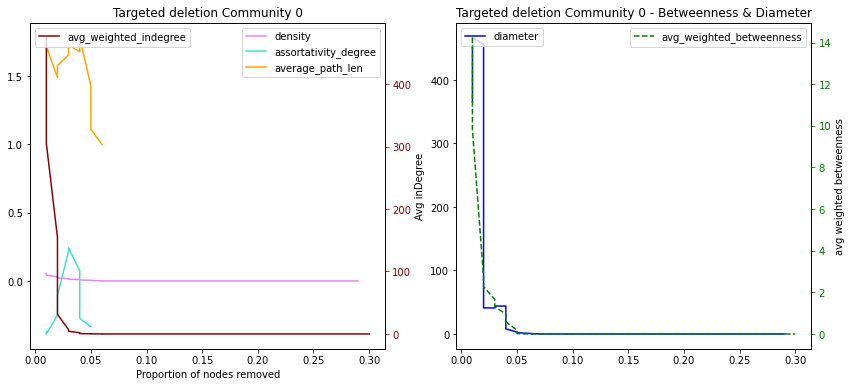

In [30]:
#Same but weighted
#Don't share y axis for type2
fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=False)

#Targeted attack LHS Graphs

ax[1].plot('prop_removed','diameter',data=df_type2_weighted,ls='-',color='blue')
ax[0].plot('prop_removed','density',data=df_type2_weighted,ls='-',color='violet')
ax[0].plot('prop_removed','assortativity_degree',data=df_type2_weighted,ls='-',color='turquoise')
ax[0].plot('prop_removed','average_path_len',data=df_type2_weighted,ls='-',color='orange')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Proportion of nodes removed')
ax[0].set_title('Targeted deletion Community 0')

ax2_2 = ax[0].twinx()
ax2_2.plot('prop_removed','avg_weighted_indegree',data=df_type2_weighted,ls='-',color='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
ax2_2.tick_params('y',colors='darkred')


#Targeted attack RHS Graphs - Betweenness & Diameter 

ax[1].set_title('Targeted deletion Community 0 - Betweenness & Diameter')
ax[1].legend(loc='upper left')

ax_bet_tar = ax[1].twinx()
ax_bet_tar.plot('prop_removed','avg_weighted_betweenness',data=df_type2_weighted,ls='--',color='green')
ax_bet_tar.tick_params('y',colors='green')
ax_bet_tar.set_ylabel('avg weighted betweenness')
ax_bet_tar.legend(loc='upper right')
plt.show()

### Set up Function for other community

In [31]:
## try for 1st community: 1
com_1 = community_edgelist_dfs[1]



## Function for attack nodes

In [32]:
#Function to run everything 
#n will be community number just so the plot looks nice
def run_all(comm,n):
    #Plot graph 
    g1 = ig.Graph.TupleList(comm.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})
    ig.plot(g1)
    #g.vs.indices
    viz1=comm['node_start'].value_counts()
    #print('Viz1:',viz1)
    uni =comm['node_start'].unique()
    ##try sort by indegree 
    temp_df = pd.DataFrame({'Node_indice':g1.vs.indices,
                         'Nodes':g1.vs['name'],
                         'In_Degree':g1.strength(mode='in',weights='weight')})
    #sort by largest degree 
    temp_df = temp_df.sort_values(by='In_Degree',ascending=False)
    viz2 = temp_df
    #print('----------------------')
    #print('Viz2:',viz2)
    #extract out by Node
    order_of_del = temp_df['Nodes'].tolist()
    
    
    ##don't bother with unweighted so will just attempt with weighted
    #Weighted on diameter
    def weighted_Type2_targeted_del(G):
        g = G.copy()
    
        num_node_removed = []
        prop_removed=[]
        node_removed = []
        dia = []
        assort_deg = []
        degree = []
        density = []
        apl = []
        bet = []
        pr = []
        auth = []
        for i in range(len(g.vs)):
            g.delete_vertices(order_of_del[i])
            #print(order_of_del[i])
            diameter = g.diameter(directed=True, weights='weight')
            dia.append(diameter)
        
            asdeg = g.assortativity_degree()
            assort_deg.append(asdeg)
        
            dense = g.density(loops=True)
            density.append(dense)
        
            between = g.betweenness(directed=True, weights='weight')
            between = sum(between)/max(len(between),1)
            bet.append(between)
            
            #try pagerank 
            page = g.pagerank(directed=True, weights='weight')
            page = sum(page)/max(len(page),1)
            pr.append(page)
            #authority score normalised by default
            kleinberg = g.authority_score(weights='weight')
            kleinberg = sum(kleinberg)/max(len(kleinberg),1)
            auth.append(kleinberg)
            
            
            #use strength
            deg = g.strength(mode='in',weights='weight')
            deg = sum(deg)/max(len(deg),1)
            degree.append(deg)
        
            avgpl = g.average_path_length()
            apl.append(avgpl)
        
            num_node_removed.append(i+1)
            prop = round((i+1)/len(order_of_del),2)
            prop_removed.append(prop)
            node_removed.append(order_of_del[i])


        df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_weighted_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'avg_PageRank':pr,
                       'avg_Authority':auth,
                       'average_path_len':apl})
    
        return(df)
    
    
    
    
    #re-use func from above
    df_type2_weighted = weighted_Type2_targeted_del(g1)
    viz3 = df_type2_weighted.head(15)
    #print(viz3)
    
    #Same but weighted
    #Don't share y axis for type2
    fig, ax = plt.subplots(1,2,figsize=(14,8),sharey=False)

   #Targeted attack LHS Graphs

    
    ax[0].plot('prop_removed','density',data=df_type2_weighted,ls='-',color='violet')
    #remove assortativity degree, replace with pagerank
    ax[0].plot('prop_removed','avg_PageRank',data=df_type2_weighted,ls='-',color='turquoise')
    # add in Authority
    ax[0].plot('prop_removed','avg_Authority',data=df_type2_weighted,ls='-',color='lightslategray')
    ax[0].plot('prop_removed','average_path_len',data=df_type2_weighted,ls='-',color='orange')
    ax[0].legend(loc='upper right')
    ax[0].set_xlabel('Proportion of nodes removed')
    ax[0].set_title('Targeted deletion - Nodes Community {}'.format(n))

    ax2_2 = ax[0].twinx()
    ax2_2.plot('prop_removed','avg_weighted_indegree',data=df_type2_weighted,ls='-',color='darkred')
    ax2_2.set_ylabel('Avg inDegree')
    ax2_2.legend(loc='upper left')
    ax2_2.tick_params('y',colors='darkred')


    #Targeted attack RHS Graphs - Betweenness & Diameter 

    ax[1].plot('prop_removed','diameter',data=df_type2_weighted,ls='-',color='blue')
    ax[1].set_title('Targeted deletion - Betweenness & Diameter')
    ax[1].legend(loc='upper left')
    
    
    ax_bet_tar = ax[1].twinx()
    ax_bet_tar.plot('prop_removed','avg_weighted_betweenness',data=df_type2_weighted,ls='--',color='green')
    ax_bet_tar.tick_params('y',colors='green')
    ax_bet_tar.set_ylabel('avg weighted betweenness')
    ax_bet_tar.legend(loc='upper right')
    plt.show()
    
    return viz1,viz2,viz3

## Function for attack edges

In [33]:
#Function to run everything 
#n will be community number just so the plot looks nice
def run_all_edges(comm,n):
    #Plot graph 
    g1 = ig.Graph.TupleList(comm.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})
    ig.plot(g1)
    #g.vs.indices
    viz1=comm['node_start'].value_counts()
    #print('Viz1:',viz1)
    uni =comm['node_start'].unique()
    #because the g.es only shows the edge ID, we need to get the vertex source and target
    ##sv = source vertex 
    ##st = source target 
    sv = []
    st = []
    for edge in g1.es:
        source_vertex_id = edge.source
        target_vertex_id = edge.target
        source_vertex = g1.vs[source_vertex_id]
        sv.append(source_vertex)
        target_vertex = g1.vs[target_vertex_id]
        st.append(target_vertex)

        
    ##get name of source vertices. sv and st each is an igraph object so need to slice them to get the names

    sv_name = []
    for i in range(len(sv)):
        name = sv[i]['name']
        sv_name.append(name)
    
    st_name = []
    for i in range(len(st)):
        target_name = st[i]['name']
        st_name.append(target_name)
    


    ## new df with edges
    edge_df = pd.DataFrame({'Edge_indice':g1.es.indices,
                         'Edges_weight':g1.es['weight'],
                         'Vertex_source':sv_name,
                         'Vertex_target':st_name})
   ##sort by descending weight
    edge_df = edge_df.sort_values(by='Edges_weight',ascending=False)
    viz2 = edge_df
    #print('----------------------')
    #print('Viz2:',viz2)
    #extract out by edge ID 
    edge_deletelist = edge_df['Edge_indice'].tolist()
    
    
    ##don't bother with unweighted so will just attempt with weighted
    #Weighted on diameter
    def Edges_weighted_Type2_targeted_del(G):
        g = G.copy()
    
        num_node_removed = []
        prop_removed=[]
        node_removed = []
        dia = []
        assort_deg = []
        degree = []
        density = []
        apl = []
        bet = []
        pr = []
        auth = []
        for i in range(len(g.es)):
            try:
                g.delete_edges(edge_deletelist[i])
            except:
                continue
            #print(order_of_del[i])
            diameter = g.diameter(directed=True, weights='weight')
            dia.append(diameter)
        
            asdeg = g.assortativity_degree()
            assort_deg.append(asdeg)
        
            dense = g.density(loops=True)
            density.append(dense)
        
            between = g.betweenness(directed=True, weights='weight')
            between = sum(between)/max(len(between),1)
            bet.append(between)
        
            #try pagerank 
            page = g.pagerank(directed=True, weights='weight')
            page = sum(page)/max(len(page),1)
            pr.append(page)
            #authority score normalised by default
            kleinberg = g.authority_score(weights='weight')
            kleinberg = sum(kleinberg)/max(len(kleinberg),1)
            auth.append(kleinberg)
        
            #use strength
            deg = g.strength(mode='in',weights='weight')
            deg = sum(deg)/max(len(deg),1)
            degree.append(deg)
        
            avgpl = g.average_path_length()
            apl.append(avgpl)
        
            num_node_removed.append(i+1)
            prop = round((i+1)/len(edge_deletelist),2) 
            prop_removed.append(prop)
            node_removed.append(edge_deletelist[i])


        df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_weighted_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'avg_PageRank':pr,
                       'avg_Authority':auth,
                       'average_path_len':apl})
    
        return(df)
    
    
    
    
    #re-use func from above
    edgedf_type2_weighted = Edges_weighted_Type2_targeted_del(g1)
    viz3 = edgedf_type2_weighted.head(15)
    #print(viz3)
    
    #Same but weighted
    #Don't share y axis for type2
    fig, ax = plt.subplots(1,2,figsize=(14,8),sharey=False)

   #Targeted attack LHS Graphs

    
    ax[0].plot('prop_removed','density',data=edgedf_type2_weighted,ls='-',color='violet')
    #remove assortativity degree, replace with pagerank
    ax[0].plot('prop_removed','avg_PageRank',data=edgedf_type2_weighted,ls='-',color='turquoise')
    # add in Authority
    ax[0].plot('prop_removed','avg_Authority',data=edgedf_type2_weighted,ls='-',color='lightslategray')
    ax[0].plot('prop_removed','average_path_len',data=edgedf_type2_weighted,ls='-',color='orange')
    ax[0].legend(loc='upper right')
    ax[0].set_xlabel('Proportion of edges removed')
    ax[0].set_title('Targeted deletion - Edges Community {}'.format(n))

    ax2_2 = ax[0].twinx()
    ax2_2.plot('prop_removed','avg_weighted_indegree',data=edgedf_type2_weighted,ls='-',color='darkred')
    ax2_2.set_ylabel('Avg inDegree')
    ax2_2.legend(loc='upper left')
    ax2_2.tick_params('y',colors='darkred')


    #Targeted attack RHS Graphs - Betweenness & Diameter 

    ax[1].plot('prop_removed','diameter',data=edgedf_type2_weighted,ls='-',color='blue')
    ax[1].set_title('Targeted deletion - Betweenness & Diameter')
    ax[1].legend(loc='upper left')
    
    
    ax_bet_tar = ax[1].twinx()
    ax_bet_tar.plot('prop_removed','avg_weighted_betweenness',data=edgedf_type2_weighted,ls='--',color='green')
    ax_bet_tar.tick_params('y',colors='green')
    ax_bet_tar.set_ylabel('avg weighted betweenness')
    ax_bet_tar.legend(loc='upper right')
    plt.show()
    
    return viz1,viz2,viz3

#### Community 0 attack edges (graph above function is community 0 attack nodes)

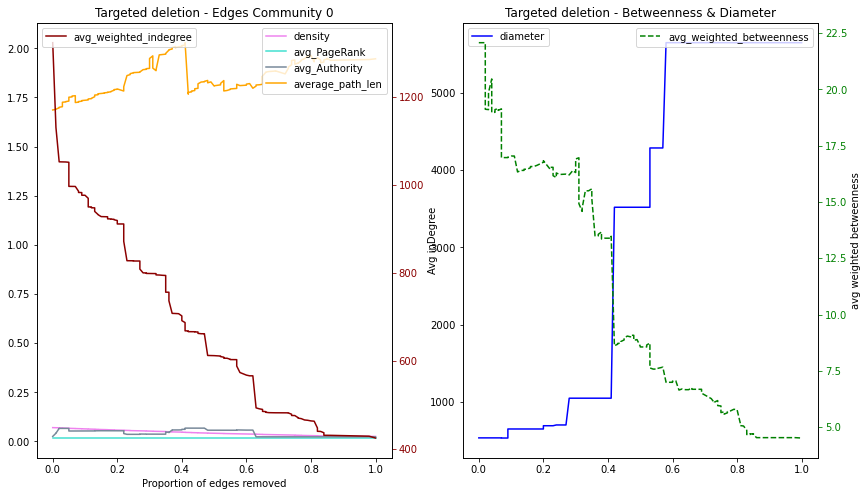

In [34]:
com0_1,com0_2,com0_3 = run_all_edges(com_0,0)

### Community 1,2,3

In [35]:
##Comm3
com_1 = community_edgelist_dfs[1]
com_2 = community_edgelist_dfs[2]
com_3 = community_edgelist_dfs[3]
#Com 4 and 5 doesn't exist for leadingeigen
#com_4 = community_edgelist_dfs[4]
#com_5 = community_edgelist_dfs[5]




#### Community 1

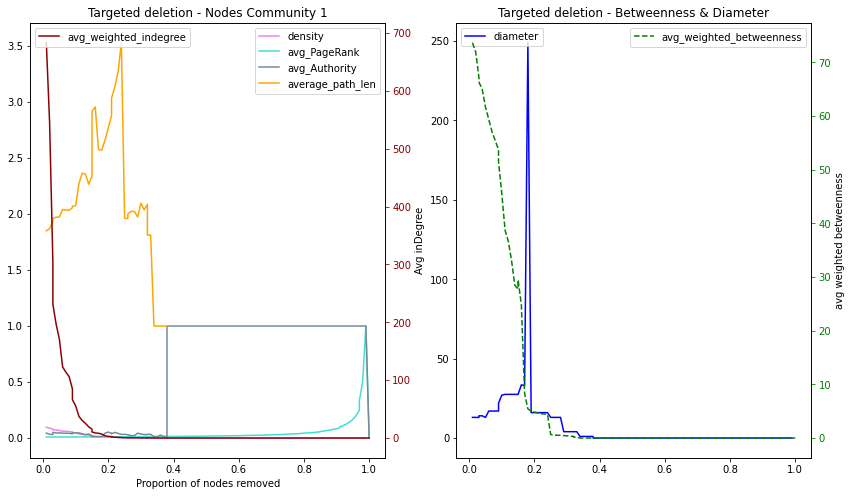

In [36]:
#attack nodes
com1_value_count, com1_sortbydeg, com1_dfplot = run_all(com_1,1)

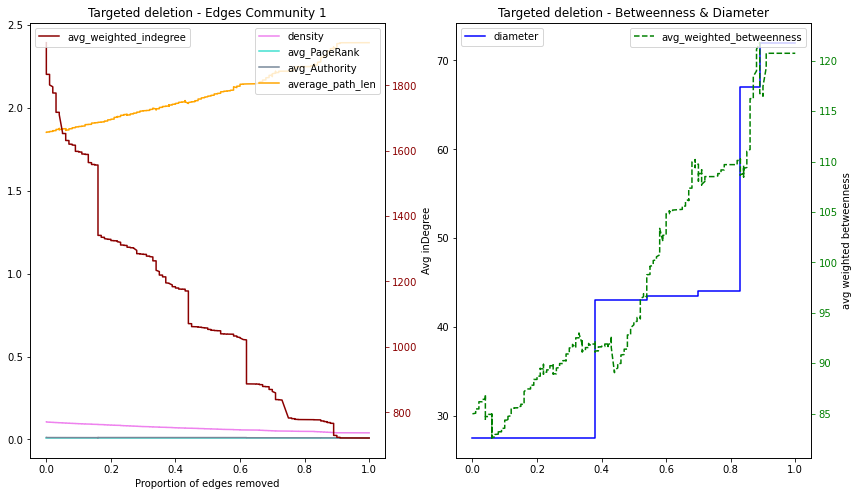

In [37]:
#attack edges
com1_value_countedge, com1_sortbydegedge, com1_dfplotedge = run_all_edges(com_1,1)

In [80]:
com1_sortbydegedge.head(10)

,Edge_indice,Edges_weight,Vertex_source,Vertex_target
460,460,65366.5,Hong Kong,British Virgin Islands
622,622,21362.5,Jersey,British Virgin Islands
1157,1157,15735.0,Taiwan,British Virgin Islands
1338,1338,11652.0,United Kingdom,British Virgin Islands
1041,1041,11524.5,Singapore,British Virgin Islands
261,261,11138.0,China,British Virgin Islands
435,435,9562.0,Guernsey,British Virgin Islands
1311,1311,7374.0,United Arab Emirates,British Virgin Islands
1369,1369,6425.0,United States,British Virgin Islands
946,946,6292.5,Russia,British Virgin Islands


In [82]:
##Hong Kong
hk_target = com1_sortbydegedge.loc[com1_sortbydegedge['Vertex_target']=='Hong Kong']
hk_target

,Edge_indice,Edges_weight,Vertex_source,Vertex_target
1166,1166,3723.0,Taiwan,Hong Kong
270,270,2046.0,China,Hong Kong
1051,1051,1040.0,Singapore,Hong Kong
1377,1377,983.5,United States,Hong Kong
152,152,896.0,British Virgin Islands,Hong Kong
...,...,...,...,...
1075,1075,1.0,Slovakia,Hong Kong
1033,1033,1.0,Sierra Leone,Hong Kong
682,682,1.0,Laos,Hong Kong
676,676,1.0,Kyrgyzstan,Hong Kong


In [83]:
##UK
uk_target = com1_sortbydegedge.loc[com1_sortbydegedge['Vertex_target']=='United Kingdom']
uk_target

,Edge_indice,Edges_weight,Vertex_source,Vertex_target
1185,1185,3858.0,Taiwan,United Kingdom
495,495,3071.0,Hong Kong,United Kingdom
292,292,2035.0,China,United Kingdom
1070,1070,1004.0,Singapore,United Kingdom
172,172,918.0,British Virgin Islands,United Kingdom
...,...,...,...,...
717,717,1.0,Madagascar,United Kingdom
712,712,1.0,Macedonia,United Kingdom
679,679,1.0,Kyrgyzstan,United Kingdom
674,674,1.0,Kenya,United Kingdom


#### Community 2

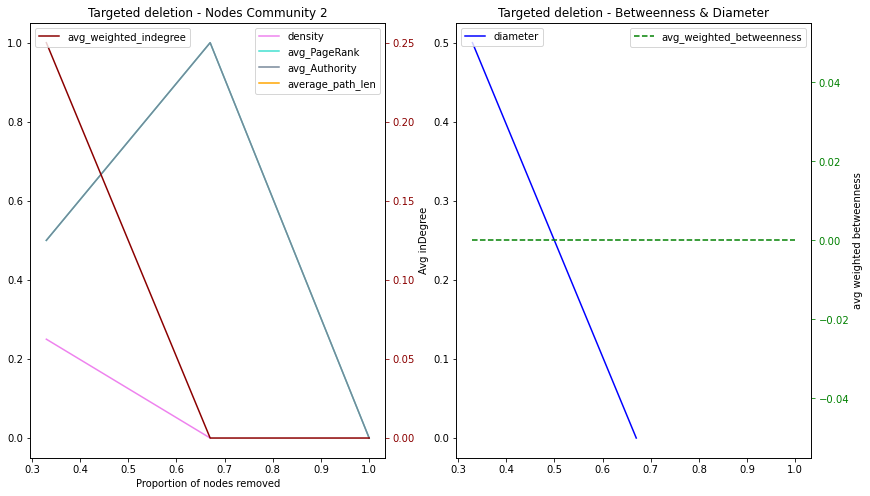

In [38]:
#attack nodes
com2_value_count, com2_sortbydeg, com2_dfplot = run_all(com_2,2)

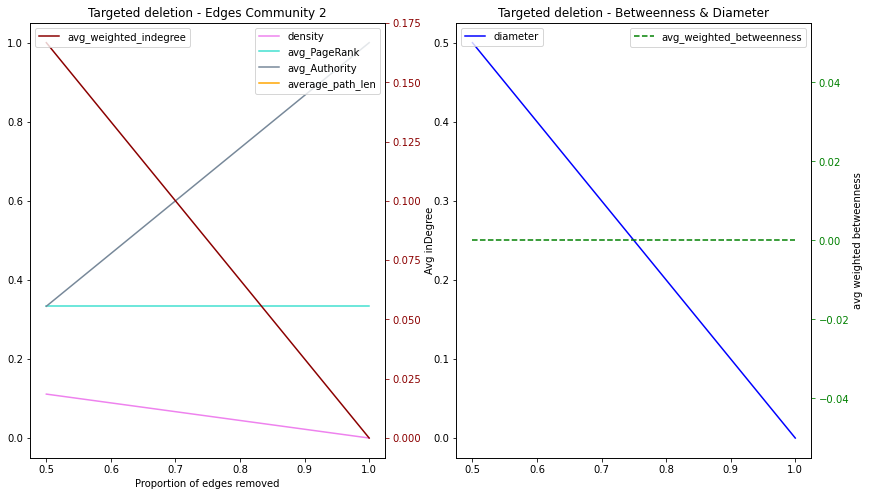

In [39]:
#attack edges
com2_value_countedge, com2_sortbydegedge, com2_dfplotedge = run_all_edges(com_2,2)

In [81]:
com2_sortbydegedge.head(10)

,Edge_indice,Edges_weight,Vertex_source,Vertex_target
1,1,8.0,Saint Lucia,Saint Lucia
0,0,0.5,France,Labuan


#### Community 3

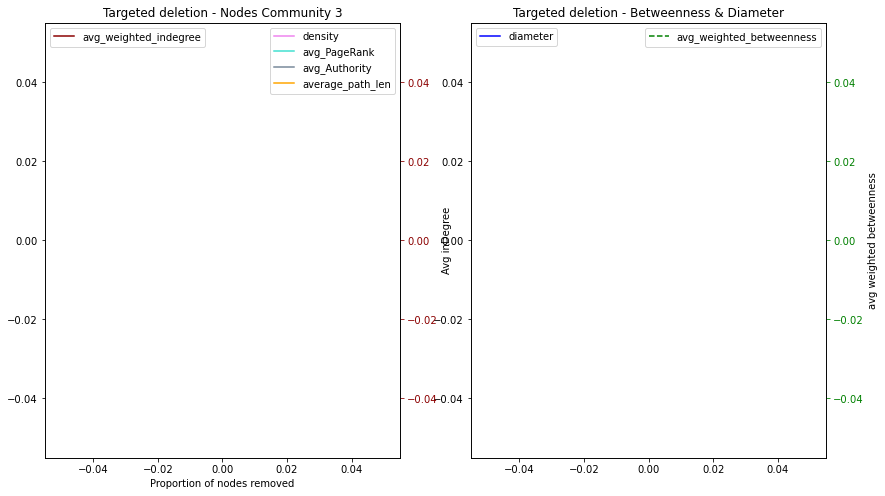

In [40]:
#attack nodes
com3_value_count, com3_sortbydeg, com3_dfplot = run_all(com_3,3)

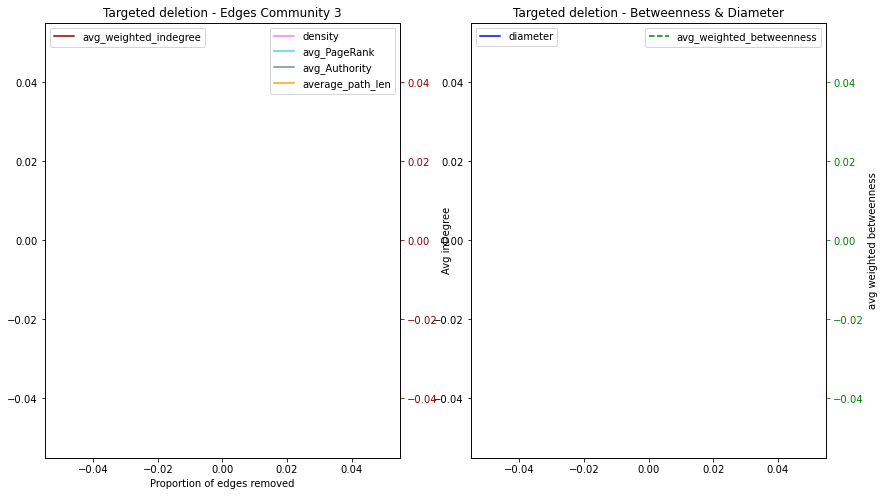

In [41]:
#attack edges
com3_value_countedge, com3_sortbydegedge, com3_dfplotedge = run_all_edges(com_3,3)

### Leading Eigen Only Jurisdiction

In [42]:
leadingeigen_only_jur_df = pd.read_csv('../directed_community_csv/df_leading_eigenvector_only_juris.csv').drop('Unnamed: 0', axis = 1)
leadingeigen_only_jur_df

,name,community
0,Albania,0
1,Bahamas,0
2,Andorra,0
3,British Virgin Islands,1
4,Cayman Islands,1
...,...,...
169,Venezuela,0
170,Vietnam,1
171,Yemen,0
172,Zambia,1


In [43]:
#make a list of communities to run next function

leadingeigen_only_jur_comms = sorted(leadingeigen_only_jur_df['community'].unique().tolist())
leadingeigen_only_jur_comms

[0, 1]

In [44]:
# get edge list for all communities

oj_community_edgelist_dfs = []

for i in range(len(leadingeigen_only_jur_comms)):
    oj_community_edgelist_dfs.append(get_edge_list(comm = i, comm_node_df = leadingeigen_only_jur_df, edges_df =  df_only_jur_grouped))
    



In [45]:
##Community only jurisdiction
oj_com_0 = oj_community_edgelist_dfs[0]
oj_com_1 = oj_community_edgelist_dfs[1]

#Leading Eigen only 0, 1 
#oj_com_2 = oj_community_edgelist_dfs[2]
#oj_com_3 = oj_community_edgelist_dfs[3]
#oj_com_4 = oj_community_edgelist_dfs[4]
#oj_com_5 = oj_community_edgelist_dfs[5]

In [46]:
oj_com_0

,node_start,node_end,size
0,Albania,Bahamas,2
1,Andorra,Bahamas,26
2,Andorra,Costa Rica,3
3,Andorra,Nevada,24
4,Andorra,Niue,12
...,...,...,...
264,Venezuela,Niue,3
265,Venezuela,Panama,526
266,Venezuela,Uruguay,2
267,Yemen,Panama,1


In [47]:
oj_com_1

,node_start,node_end,size
0,Angola,Bermuda,1
1,Angola,British Virgin Islands,11
2,Aruba,Barbados,1
3,Aruba,British Anguilla,4
4,Aruba,British Virgin Islands,19
...,...,...,...
341,Vanuatu,Cook Islands,1
342,Vietnam,British Virgin Islands,17
343,Vietnam,Cayman Islands,11
344,Vietnam,Cook Islands,1


#### Community 0

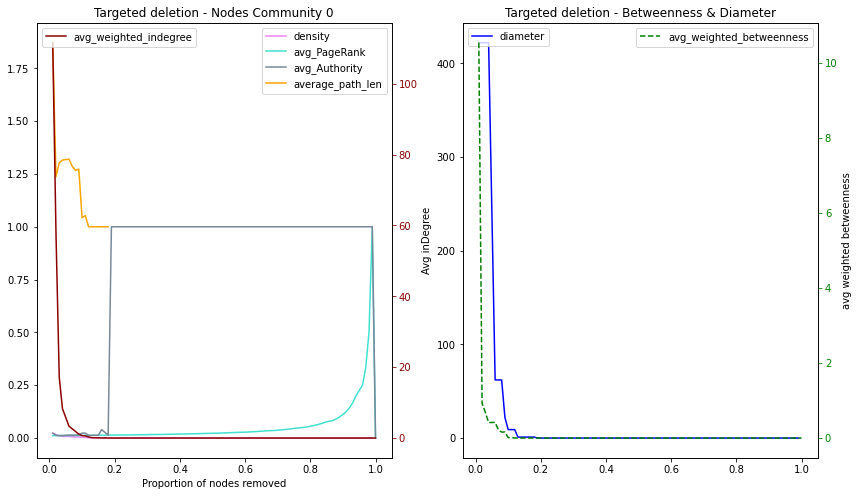

In [48]:
#attack nodes
oj_com0_value_count, oj_com0_sortbydeg, oj_com0_dfplot = run_all(oj_com_0,0)

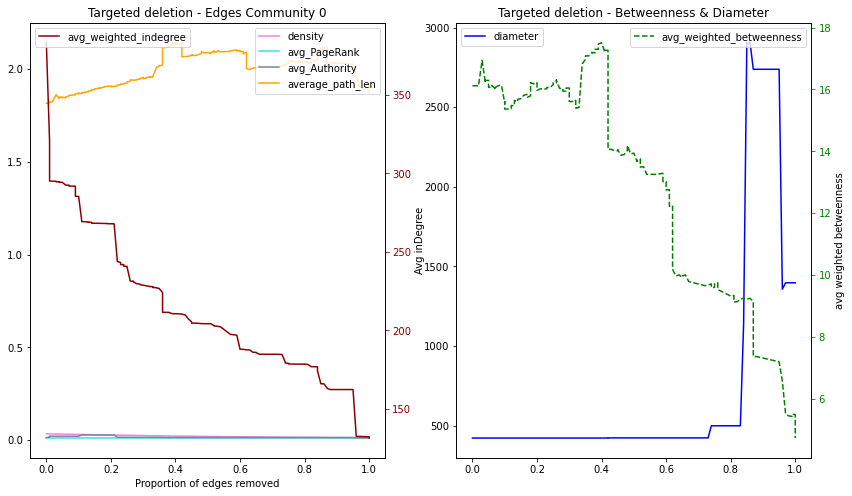

In [49]:
#attack edges
oj_com0_value_countedge, oj_com0_sortbydegedge, oj_com0_dfplotedge = run_all_edges(oj_com_0,0)

In [75]:
## look at nodes (not edges) for community 0 
oj_com0_sortbydeg.head(10)

,Node_indice,Nodes,In_Degree
6,6,Panama,33039.0
1,1,Bahamas,5526.0
5,5,Niue,5204.0
4,4,Nevada,1151.0
52,52,Labuan,422.0
16,16,Belize,101.0
3,3,Costa Rica,78.0
85,85,State of Delaware,62.0
7,7,Uruguay,36.0
14,14,Wyoming,35.0


In [50]:
## look at edges for community 0 (viz2 in code i.e. oj_comxx_sortbydegedge)
oj_com0_sortbydegedge.head(10)

,Edge_indice,Edges_weight,Vertex_source,Vertex_target
235,235,11590,Switzerland,Panama
142,142,5584,Luxembourg,Panama
258,258,2653,Uruguay,Panama
23,23,2256,Bahamas,Panama
230,230,2127,Switzerland,Bahamas
234,234,2074,Switzerland,Niue
178,178,1589,Panama,Niue
156,156,1402,Monaco,Panama
60,60,1357,Colombia,Panama
173,173,1120,Panama,Bahamas


In [79]:
##study Panama
panama = oj_com0_sortbydegedge.loc[oj_com0_sortbydegedge['Vertex_source']=='Panama']
panama

,Edge_indice,Edges_weight,Vertex_source,Vertex_target
178,178,1589,Panama,Niue
173,173,1120,Panama,Bahamas
176,176,82,Panama,Nevada
174,174,40,Panama,Belize
179,179,7,Panama,Uruguay
180,180,5,Panama,Wyoming
175,175,5,Panama,Costa Rica
177,177,2,Panama,New Zealand


In [51]:
#Russia belongs to community 1 for Only jurisdiction
#russia = oj_com0_sortbydegedge.loc[oj_com0_sortbydegedge['Vertex_source']=='Russia']
#russia

#### Community 1

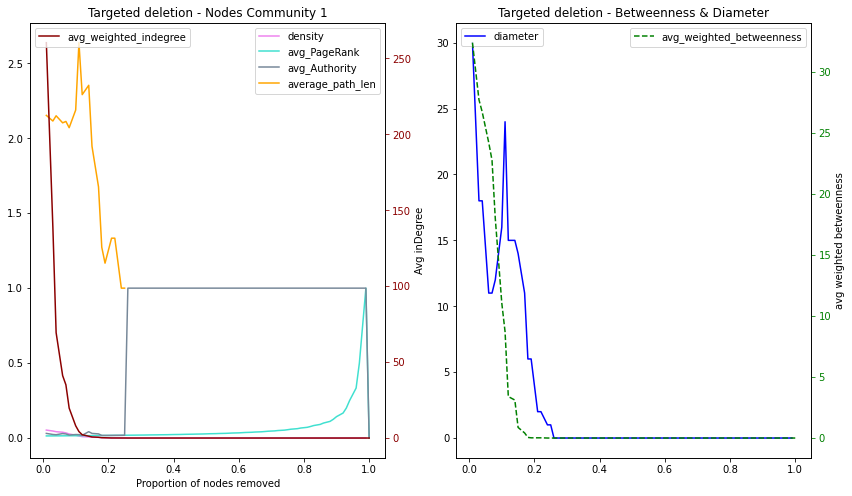

In [52]:
#attack nodes
oj_com1_value_count, oj_com1_sortbydeg, oj_com1_dfplot = run_all(oj_com_1,1)

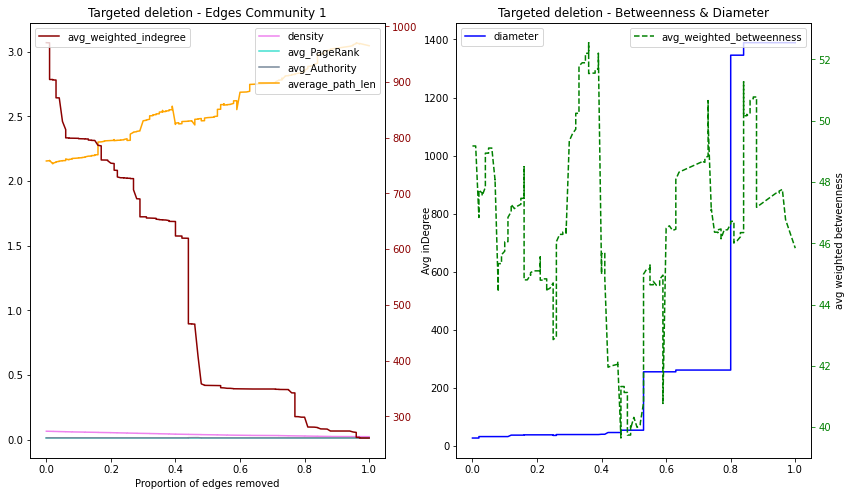

In [53]:
#attack edges
oj_com1_value_countedge, oj_com1_sortbydegedge, oj_com1_dfplotedge = run_all_edges(oj_com_1,1)

In [54]:
russia = oj_com1_sortbydegedge.loc[oj_com1_sortbydegedge['Vertex_source']=='Russia']
russia

,Edge_indice,Edges_weight,Vertex_source,Vertex_target
254,254,2311,Russia,British Virgin Islands
253,253,73,Russia,British Anguilla
252,252,25,Russia,Bermuda
258,258,21,Russia,Seychelles
255,255,5,Russia,Cayman Islands
257,257,5,Russia,Samoa
256,256,3,Russia,Hong Kong


In [76]:
## look at nodes for community 1 
oj_com1_sortbydeg.head(10)

,Node_indice,Nodes,In_Degree
2,2,British Virgin Islands,77741.0
10,10,Seychelles,8749.0
26,26,Samoa,4933.0
5,5,British Anguilla,1990.0
4,4,Barbados,1498.0
1,1,Bermuda,1042.0
7,7,Cayman Islands,667.0
9,9,Isle of Man,231.0
16,16,Hong Kong,218.0
8,8,Cook Islands,187.0


In [55]:
## look at edges for community 1 (viz2 in code i.e. oj_comxx_sortbydegedge)
oj_com1_sortbydegedge.head(10)

,Edge_indice,Edges_weight,Vertex_source,Vertex_target
130,130,27498,Hong Kong,British Virgin Islands
186,186,10602,Jersey,British Virgin Islands
329,329,5485,United Kingdom,British Virgin Islands
117,117,4734,Guernsey,British Virgin Islands
279,279,4034,Singapore,British Virgin Islands
135,135,3749,Hong Kong,Seychelles
319,319,3522,United Arab Emirates,British Virgin Islands
168,168,3064,Isle of Man,British Virgin Islands
134,134,3012,Hong Kong,Samoa
254,254,2311,Russia,British Virgin Islands


### Leading Eigen All Jurisdiction

In [56]:
leadingeigen_all_jur_df = pd.read_csv('../directed_community_csv/df_leading_eigenvector_all_juris.csv').drop('Unnamed: 0', axis = 1)
leadingeigen_all_jur_df

,name,community
0,Albania,0
1,Bahamas,0
2,Andorra,0
3,British Virgin Islands,1
4,Cayman Islands,1
...,...,...
169,Venezuela,0
170,Vietnam,1
171,Yemen,0
172,Zambia,1


In [57]:
#make a list of communities to run next function

leadingeigen_all_jur_comms = sorted(leadingeigen_all_jur_df['community'].unique().tolist())
leadingeigen_all_jur_comms

[0, 1]

In [58]:
# get edge list for all communities
##check range is correct df 
#Check comm_node_df and edges_df

all_community_edgelist_dfs = []

for i in range(len(leadingeigen_all_jur_comms)):
    all_community_edgelist_dfs.append(get_edge_list(comm = i, comm_node_df = leadingeigen_all_jur_df, edges_df =  df_all_jur_grouped))
    




In [59]:
##Community all jurisdiction
all_com_0 = all_community_edgelist_dfs[0]
all_com_1 = all_community_edgelist_dfs[1]
#all_com_2 = all_community_edgelist_dfs[2]
#all_com_3 = all_community_edgelist_dfs[3]
#all_com_4 = all_community_edgelist_dfs[4]
#all_com_5 = all_community_edgelist_dfs[5]
#all_com_6 = all_community_edgelist_dfs[6]

#### Community 0

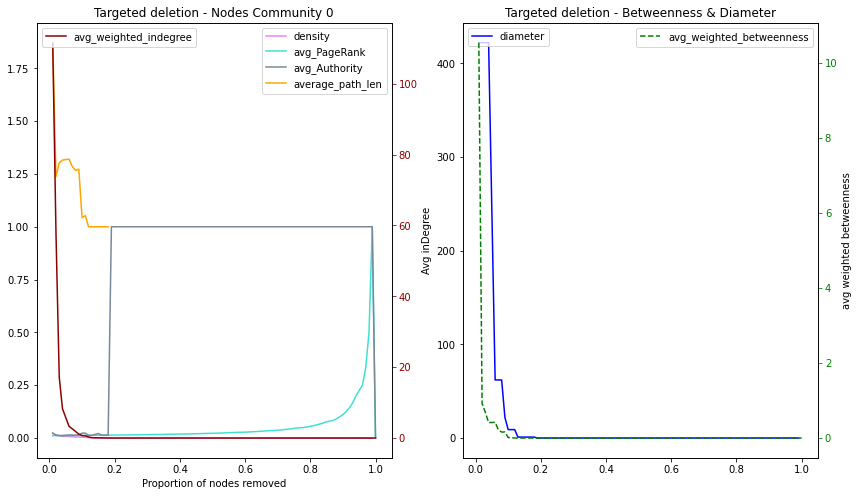

In [60]:
#attack nodes
all_com0_value_count, all_com0_sortbydeg, all_com0_dfplot = run_all(all_com_0,0)

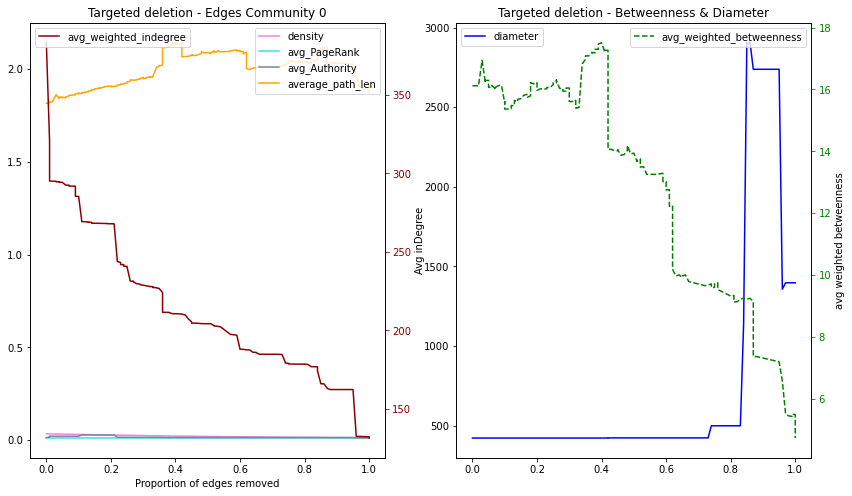

In [61]:
#attack edges
all_com0_value_countedge, all_com0_sortbydegedge, all_com0_dfplotedge = run_all_edges(all_com_0,0)

In [84]:
all_com0_sortbydegedge.head(10)

,Edge_indice,Edges_weight,Vertex_source,Vertex_target
235,235,11590,Switzerland,Panama
142,142,5584,Luxembourg,Panama
258,258,2653,Uruguay,Panama
23,23,2256,Bahamas,Panama
230,230,2127,Switzerland,Bahamas
234,234,2074,Switzerland,Niue
178,178,1589,Panama,Niue
156,156,1402,Monaco,Panama
60,60,1357,Colombia,Panama
173,173,1120,Panama,Bahamas


#### Community 1

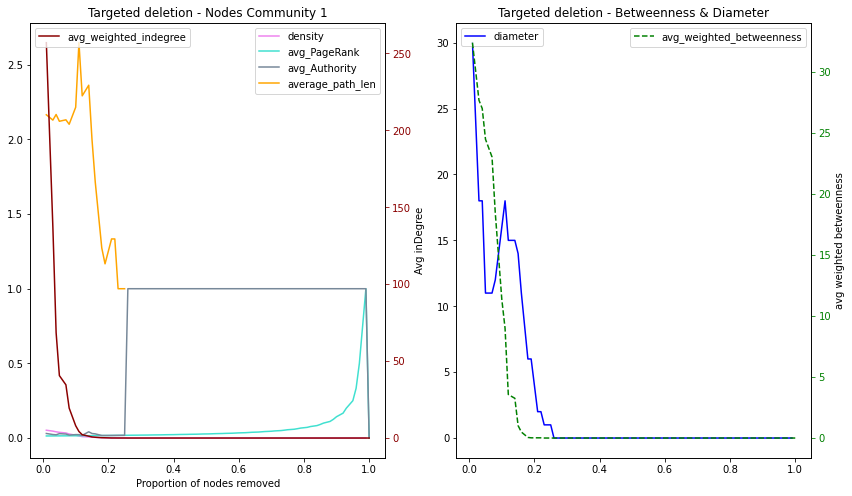

In [62]:
#attack nodes
all_com1_value_count, all_com1_sortbydeg, all_com1_dfplot = run_all(all_com_1,1)

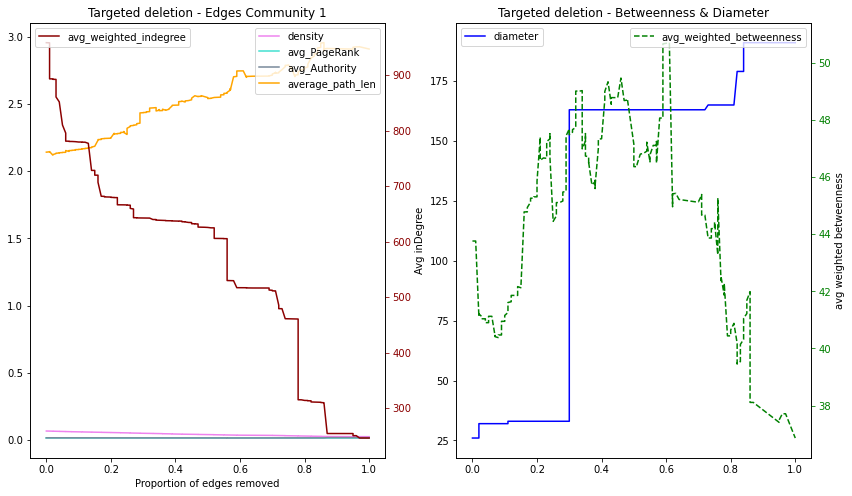

In [63]:
#attack edges
all_com1_value_countedge, all_com1_sortbydegedge, all_com1_dfplotedge = run_all_edges(all_com_1,1)

In [85]:
all_com1_sortbydegedge.head(10)

,Edge_indice,Edges_weight,Vertex_source,Vertex_target
134,134,27510,Hong Kong,British Virgin Islands
191,191,10603,Jersey,British Virgin Islands
335,335,5487,United Kingdom,British Virgin Islands
121,121,4734,Guernsey,British Virgin Islands
284,284,4037,Singapore,British Virgin Islands
139,139,3749,Hong Kong,Seychelles
325,325,3525,United Arab Emirates,British Virgin Islands
173,173,3064,Isle of Man,British Virgin Islands
138,138,3012,Hong Kong,Samoa
259,259,2311,Russia,British Virgin Islands


In [86]:
##Hong Kong
hk_target = all_com1_sortbydegedge.loc[all_com1_sortbydegedge['Vertex_target']=='Hong Kong']
hk_target

,Edge_indice,Edges_weight,Vertex_source,Vertex_target
55,55,76,Cayman Islands,Hong Kong
195,195,66,Jersey,Hong Kong
269,269,16,Samoa,Hong Kong
222,222,11,Liechtenstein,Hong Kong
69,69,9,China,Hong Kong
287,287,8,Singapore,Hong Kong
177,177,7,Isle of Man,Hong Kong
338,338,4,United Kingdom,Hong Kong
86,86,4,Cyprus,Hong Kong
309,309,3,Thailand,Hong Kong


In [87]:
##UK
uk_target = all_com1_sortbydegedge.loc[all_com1_sortbydegedge['Vertex_target']=='United Kingdom']
uk_target

,Edge_indice,Edges_weight,Vertex_source,Vertex_target
202,202,6,Jersey,United Kingdom
184,184,2,Isle of Man,United Kingdom
292,292,1,Singapore,United Kingdom
271,271,1,Samoa,United Kingdom


### Leading Eigen No Intermediaries

In [64]:
leadingeigen_no_int_df = pd.read_csv('../directed_community_csv/df_leading_eigenvector_no_inter.csv').drop('Unnamed: 0', axis = 1)
leadingeigen_no_int_df

,name,community
0,Albania,0
1,Bahamas,0
2,Algeria,1
3,British Virgin Islands,1
4,United Kingdom,1
...,...,...
190,Venezuela,0
191,Vietnam,1
192,Yemen,0
193,Zambia,1


In [65]:
#make a list of communities to run next function

leadingeigen_no_int_comms = sorted(leadingeigen_no_int_df['community'].unique().tolist())
leadingeigen_no_int_comms

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [66]:
# get edge list for all communities

no_int_community_edgelist_dfs = []

for i in range(len(leadingeigen_no_int_comms)):
    no_int_community_edgelist_dfs.append(get_edge_list(comm = i, comm_node_df = leadingeigen_no_int_df, edges_df =  df_no_int_grouped))
    




In [67]:
##Community No intermediaries
ni_com_0 = no_int_community_edgelist_dfs[0]
ni_com_1 = no_int_community_edgelist_dfs[1]
ni_com_2 = no_int_community_edgelist_dfs[2]
ni_com_3 = no_int_community_edgelist_dfs[3]
ni_com_4 = no_int_community_edgelist_dfs[4]
ni_com_5 = no_int_community_edgelist_dfs[5]
ni_com_6 = no_int_community_edgelist_dfs[6]
ni_com_7 = no_int_community_edgelist_dfs[7]
ni_com_8 = no_int_community_edgelist_dfs[8]

#### Community 0 

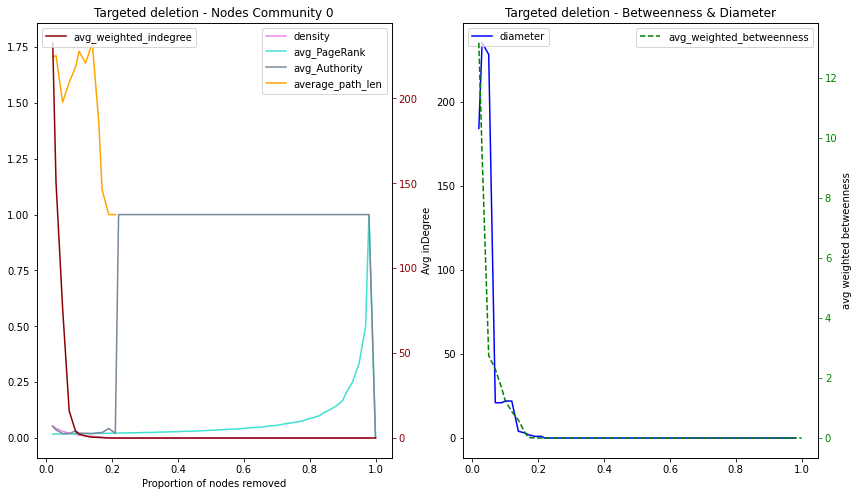

In [68]:
#attack nodes
ni_com0_value_count, ni_com0_sortbydeg, ni_com0_dfplot = run_all(ni_com_0,0)

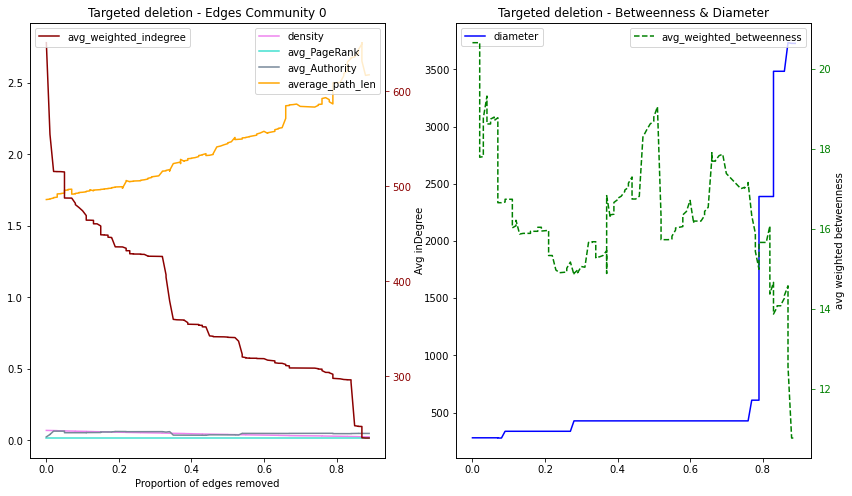

In [69]:
#attack edges
ni_com0_value_countedge, ni_com0_sortbydegedge, ni_com0_dfplotedge = run_all_edges(ni_com_0,0)

In [71]:
ni_com0_sortbydegedge.head(10)

,Edge_indice,Edges_weight,Vertex_source,Vertex_target
216,216,11626,Switzerland,Panama
144,144,5585,Luxembourg,Panama
226,226,2654,Uruguay,Panama
19,19,2264,Bahamas,Panama
211,211,2127,Switzerland,Bahamas
215,215,2074,Switzerland,Niue
217,217,1635,Switzerland,Seychelles
167,167,1589,Panama,Niue
145,145,1421,Luxembourg,Seychelles
156,156,1407,Monaco,Panama


#### Community 1

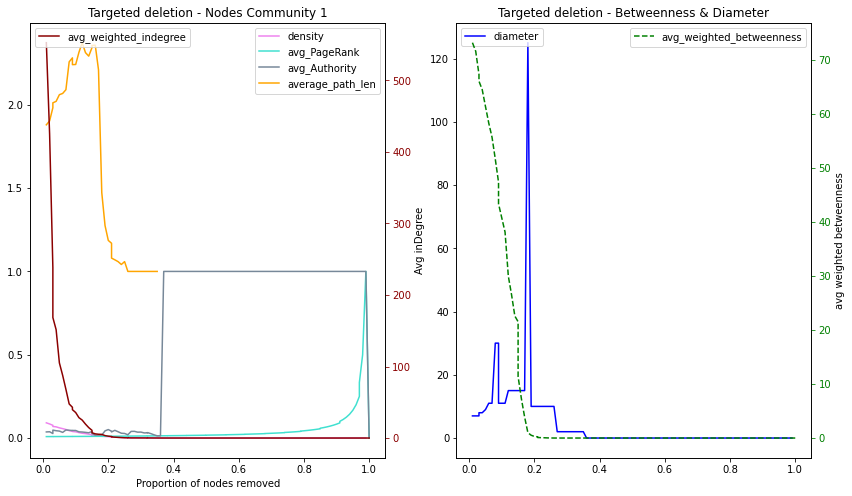

In [72]:
#attack nodes
ni_com1_value_count, ni_com1_sortbydeg, ni_com1_dfplot = run_all(ni_com_1,1)

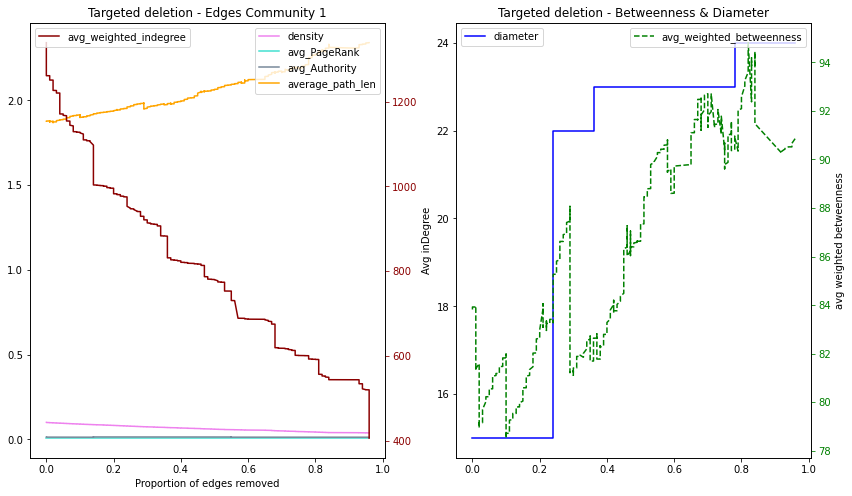

In [73]:
#attack edge
ni_com1_value_countedge, ni_com1_sortbydegedge, ni_com1_dfplotedge = run_all_edges(ni_com_1,1)

In [74]:
ni_com1_sortbydegedge.head(10)

,Edge_indice,Edges_weight,Vertex_source,Vertex_target
436,436,36626,Hong Kong,British Virgin Islands
1109,1109,13305,Taiwan,British Virgin Islands
590,590,10746,Jersey,British Virgin Islands
246,246,8662,China,British Virgin Islands
1014,1014,6888,Singapore,British Virgin Islands
1280,1280,6057,United Kingdom,British Virgin Islands
408,408,4825,Guernsey,British Virgin Islands
1309,1309,4280,United States,British Virgin Islands
921,921,3936,Russia,British Virgin Islands
1255,1255,3826,United Arab Emirates,British Virgin Islands


#### Community 2

In [ ]:
#attack nodes
ni_com2_value_count, ni_com2_sortbydeg, ni_com2_dfplot = run_all(ni_com_2,2)

In [ ]:
#attack edges
ni_com2_value_countedge, ni_com2_sortbydegedge, ni_com2_dfplotedge = run_all_edges(ni_com_2,2)

#### Community 3

In [ ]:
#attack nodes
ni_com3_value_count, ni_com3_sortbydeg, ni_com3_dfplot = run_all(ni_com_3,3)

In [ ]:
#attack edges
ni_com3_value_countedge, ni_com3_sortbydegedge, ni_com3_dfplotedge = run_all_edges(ni_com_3,3)

#### Community 4

In [ ]:
#attack nodes
ni_com4_value_count, ni_com4_sortbydeg, ni_com4_dfplot = run_all(ni_com_4,4)

In [ ]:
#attack edges
ni_com4_value_countedge, ni_com4_sortbydegedge, ni_com4_dfplotedge = run_all_edges(ni_com_4,4)

#### Community 5

In [ ]:
#attack nodes
ni_com5_value_count, ni_com5_sortbydeg, ni_com5_dfplot = run_all(ni_com_5,5)

In [ ]:
#attack edges
ni_com5_value_countedge, ni_com5_sortbydegedge, ni_com5_dfplotedge = run_all_edges(ni_com_5,5)

#### Community 6

In [ ]:
#attack nodes
ni_com6_value_count, ni_com6_sortbydeg, ni_com6_dfplot = run_all(ni_com_6,6)

In [ ]:
#attack edges
ni_com6_value_countedge, ni_com6_sortbydegedge, ni_com6_dfplotedge = run_all_edges(ni_com_6,6)

#### Community 7

In [ ]:
#attack nodes
ni_com7_value_count, ni_com7_sortbydeg, ni_com7_dfplot = run_all(ni_com_7,7)

In [ ]:
#attack edges
ni_com7_value_countedge, ni_com7_sortbydegedge, ni_com7_dfplotedge = run_all_edges(ni_com_7,7)

#### Community 8

In [ ]:
#attack nodes
ni_com8_value_count, ni_com8_sortbydeg, ni_com8_dfplot = run_all(ni_com_8,8)

In [ ]:
#attack edges
ni_com8_value_countedge, ni_com8_sortbydegedge, ni_com8_dfplotedge = run_all_edges(ni_com_8,8)